<a href="https://colab.research.google.com/github/GaurRitika/P_Folder/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Theory

 Types of Machine learning
 1. Supervised ml
 2. Unsupervised ml
 3. Semi-Supervised ml

 In Supervised : 1. Classification and 2. Regression

 Now , regression means we work on that dataset in which the output will be a numerical .

 Hence

 ##Linear Regression
 is a supervised ml algo .

 1. Simple LR:
 1 i/p and 1 o/p col. eg cgpa(i/p) v/s package(o/p). As package will depend on cgpa.
 2. Multiple LR:
 eg cgpa , gender , place , 12th marks (i/p) v/s package(o/p).
 3. Polynomial LR:
 If the data is not linear.
 4. Regularistaion


 1. Simple LR

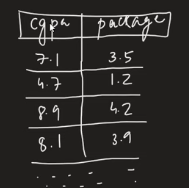




We need to create a model in which cgpa is the input and the output is package .
1. Firstly we need to plot this.
2. As the data is short of linear , means not completely linear...As this is real world dataset so offcourse....

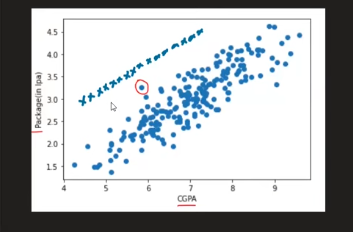



y = mx+b , now as data is real world , hence need to assume best-fit line.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('/content/sample_data/placementS.csv')

In [4]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


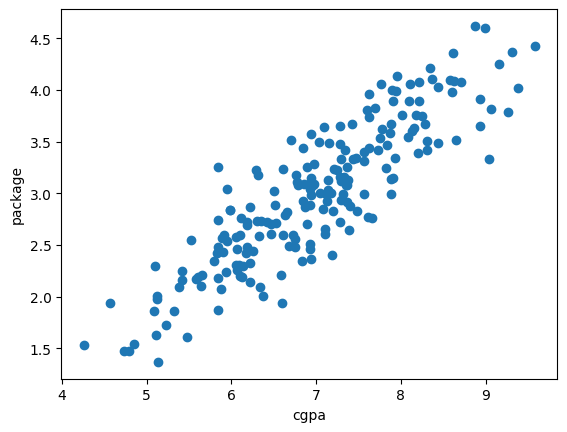

In [5]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('cgpa')
plt.ylabel('package')
plt.show()

In [6]:
#now we will seperate both x and y values
x = df.iloc[:,0 :1]
y = df.iloc[:,-1]

In [7]:
x

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [8]:
y

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57
...,...
195,2.46
196,2.57
197,3.24
198,3.96


In [9]:
#lets split the datasets in 2 parts , training set and the testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [10]:
#Applying algo
from sklearn.linear_model import LinearRegression
lr = LinearRegression()#object creation
lr.fit(x_train,y_train) #fit method for training

LinearRegression()

In [11]:
x_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [12]:
y_test

,package
112,4.10
29,3.49
182,2.08
199,2.33
193,1.94
85,1.48
10,1.86
54,3.09
115,4.21
35,2.87


In [13]:
#u got this error
lr.predict(x_test.iloc[0].values.reshape(1,1))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

In [14]:
#hn , algo is running offff....
lr.predict(x_test.iloc[1].values.reshape(1,1))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.09324469])

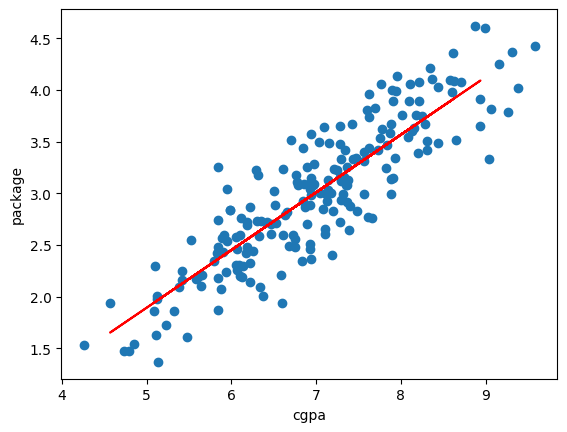

In [15]:
#let's feel that line
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_test,lr.predict(x_test),color='red')
plt.xlabel('cgpa')
plt.ylabel('package')
plt.show()

In [16]:
#slope val
m = lr.coef_

In [17]:
#intercept
b = lr.intercept_

In [18]:
m , b

(array([0.55795197]), np.float64(-0.8961119222429144))

In [19]:
y=m * 8.85 + b
print(y)

[4.04176304]


Now , we have i/p var & o/p var , and as the data is clustered so we will find best fit line , and we find the m and b val . So that's the main thing.

1. Closed form solution: When u can make mathematical formulation  .(OLS)
2. Non - closed form solution : Like we will use approximation here , like differentiation & integration , gradient desecent.

b = y - mx


In [20]:
class MeraLr:
  #constructor
  def __init__(self):
    self.m = None
    self.b = None

  #method
  #fit to train the model
  def fit(self,x_train,y_train):
    print(x_train.shape)
    print(y_train.shape)


    #m's val ke liye joh equation heh
    num = 0
    den = 0
    for i in range(x_train.shape[0]):
     num = num + (x_train[i] - x_train.mean()) * (y_train[i] - y_train.mean())
     den = den + (x_train[i] - x_train.mean()) * (x_train[i] - x_train.mean())
    #this is what i wrote in notes

    self.m = num/den
    self.b = y_train.mean() - (self.m * x_train.mean())
    print(self.m)
    print(self.b)
  #predict
  def predict(self , x_test ):
    pass

     #imp is to find the val of m & b

In [21]:
df = pd.read_csv('/content/sample_data/placementS.csv')

In [22]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [23]:
y = df.iloc[:,1].values #values , b/c numpy array meh

In [24]:
x = df.iloc[:,0].values

In [25]:
x , y

(array([6.89, 5.12, 7.82, 7.42, 6.94, 7.89, 6.73, 6.75, 6.09, 8.31, 5.32,
        6.61, 8.94, 6.93, 7.73, 7.25, 6.84, 5.38, 6.94, 7.48, 7.28, 6.85,
        6.14, 6.19, 6.53, 7.28, 8.31, 5.42, 5.94, 7.15, 7.36, 8.1 , 6.96,
        6.35, 7.34, 6.87, 5.99, 5.9 , 8.62, 7.43, 9.38, 6.89, 5.95, 7.66,
        5.09, 7.87, 6.07, 5.84, 8.63, 8.87, 9.58, 9.26, 8.37, 6.47, 6.86,
        8.2 , 5.84, 6.6 , 6.92, 7.56, 5.61, 5.48, 6.34, 9.16, 7.36, 7.6 ,
        5.11, 6.51, 7.56, 7.3 , 5.79, 7.47, 7.78, 8.44, 6.85, 6.97, 6.94,
        8.99, 6.59, 7.18, 7.63, 6.1 , 5.58, 8.44, 4.26, 4.79, 7.61, 8.09,
        4.73, 6.42, 7.11, 6.22, 7.9 , 6.79, 5.83, 6.63, 7.11, 5.98, 7.69,
        6.61, 7.95, 6.71, 5.13, 7.05, 7.62, 6.66, 6.13, 6.33, 7.76, 7.77,
        8.18, 5.42, 8.58, 6.94, 5.84, 8.35, 9.04, 7.12, 7.4 , 7.39, 5.23,
        6.5 , 5.12, 5.1 , 6.06, 7.33, 5.91, 6.78, 7.93, 7.29, 6.68, 6.37,
        5.84, 6.05, 7.2 , 6.1 , 5.64, 7.14, 7.91, 7.19, 7.91, 6.76, 6.93,
        4.85, 6.17, 5.84, 6.07, 5.66, 

In [26]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2 , random_state= 2)

In [27]:
x_train.shape

(160,)

In [28]:
#object lr , from lr class
lr = MeraLr()
lr.fit(x_train,y_train)

(160,)
(160,)
0.5579519734250721
-0.8961119222429152


#from the previous one we also got m = 0.55.. and b = -0.89....

In [29]:
x_test[0]

np.float64(8.58)

In [30]:
print(lr.predict(x_test[0]))

None


#Multiple Linear Regression

In [31]:
#We made a dataset , using this function called make_regression , a function in sklearn

from sklearn.datasets import make_regression
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [32]:
#we generated a dataset of 1000 rows , 2 i/p columns , and 1 output columns
x, y = make_regression(n_samples=1000, n_features=2, n_informative = 2 ,n_targets=1, noise=50, random_state=42)

In [33]:
#lets convert this dataset to dataframe
df = pd.DataFrame({'feature1':x[:,0] ,'feature2':x[:,1],'target':y})

In [34]:
df.head() #example of multiple linear regresiion dataset

,feature1,feature2,target
0,-0.167118,0.146714,-51.644627
1,-0.020902,0.117327,-63.084679
2,0.150419,0.364961,54.746260
3,0.555604,0.089581,-59.534033
4,0.058209,-1.142970,-50.277592


In [35]:
df.shape

(1000, 3)

In [36]:
#let's see how this data visualise in 3d
fig = px.scatter_3d(df , x='feature1' , y='feature2' , z='target')
fig.show()

Ok , now let's use the diabetes datasets


In [37]:
import numpy as np
from sklearn.datasets import load_diabetes

In [38]:
X,y = load_diabetes(return_X_y=True)

In [39]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [40]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [41]:
x.shape , y.shape

((1000, 2), (442,))

#Using Sklearn's Linear Regression

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [43]:
print(X_train.shape)
print(X_test.shape)

(353, 10)
(89, 10)


In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
#make object
reg = LinearRegression()

In [46]:
#use method , train model
reg.fit(X_train,y_train)

LinearRegression()

In [47]:
y_pred = reg.predict(X_test)

In [48]:
from sklearn.metrics import r2_score

In [49]:
r2_score(y_test,y_pred)

0.4399338661568968

In [50]:
reg.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [51]:
reg.intercept_

np.float64(151.88331005254167)

#Making our own Linear Regression Class

In [52]:
class MeraLR:
  def __init__(self):
    self.coef_ = None
    self.intercept_ = None
  def fit(self,X_train,y_train):
    X_train = np.insert(X_train,0,1,axis=1)
    betas = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
    #self.intercept_ = np.insert(X_train,0,1,axis=1)
    print(X_train.shape)
    print(y_train.shape)
    self.intercept_ = betas[0]
    self.coef_ = betas[1:]
    print(betas)


  def predict(self,X_test):
    # Need to add a column of ones to X_test for the intercept term
    X_test_with_intercept = np.insert(X_test, 0, 1, axis=1)
    # The betas array from the fit method contains intercept as betas[0] and coefficients from betas[1:]
    # So, we can directly use the betas array for prediction, but need to reconstruct it first if it's not saved
    # Or, predict as follows using saved intercept_ and coef_
    y_pred = np.dot(X_test, self.coef_) + self.intercept_
    return y_pred

In [53]:
lr = MeraLr()

In [54]:
lr.fit(X_train,y_train)

(353, 10)
(353,)
[ 361.50360488   88.07934661  973.86116803  748.88567002  357.89934365
  288.42663357 -623.51362006  711.87041694  945.48428279  607.75806577]
[150.76698182 150.53398106 151.28880743 151.09709268 150.76391042
 150.70470867 149.92759118 151.06554982 151.26462583 150.97682962]


In [55]:
#go back to function again
#np.linalg.inv(np.dot(X_train.T,X_train))



we need to calculate that beta's matrix
now we will use a function , which will add a new col
so hum fit  meh insert karenge


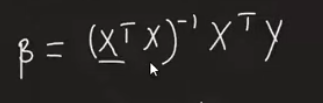

X = Matrix
x = X_train
y = y_train

now u have xtest , bo , u need to predict   
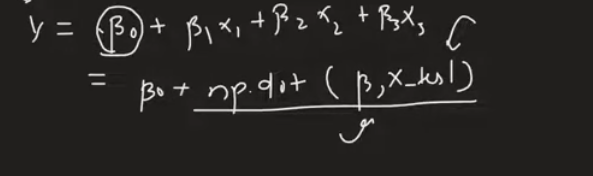

In [56]:
#now x_test = (89 , 10) , coeff = (10 , 1) , dot product = (89 , 1) , now for each 89 row , 1 val mil rahi , in which i need to add bo
#y_pred = np.dot(x_test,coeff) + self.intercept_


In [57]:
y_pred = lr.predict(x_test)